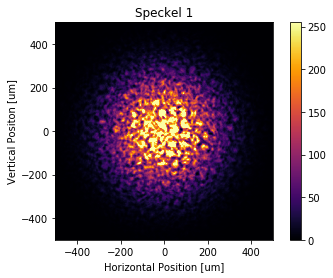

In [1]:
from PIL import Image 
import numpy as np
import matplotlib.pyplot as plt
spk_1 = Image.open('C:\\Users\\User\\Downloads\\supreme-01-01.png', "r" ) # Enter the directory of the speckle pic

%matplotlib inline
# ploting the speckle pic with a pixle scale (1 um meter) axis

dx_m = 1*10**-6  #pixel size in meter
Dx_m = 1e-3      #image full size

extent = (-Dx_m/2 * 1e6, +Dx_m/2 * 1e6, -Dx_m/2 * 1e6, +Dx_m/2 * 1e6) # Setting up axis scale and origin

plt.imshow(spk_1, extent = extent, cmap = 'inferno')
plt.xlabel('Horizontal Position [um]')
plt.ylabel('Vertical Positon [um]')
plt.title('Speckel 1')
plt.colorbar()
plt.show()

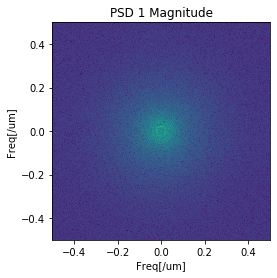

In [2]:
x_m = np.linspace(-Dx_m/2, Dx_m/2, Dx_m/dx_m + 1)
real_axis = x_m
fs = 1/(real_axis[1]-real_axis[0]) # Setting the unit of the frequncy scale to 1/um (when i do the calculations i get 1/mm)
Nfft=len(real_axis)
            
df = fs/Nfft
f_cpm = np.linspace(0,(fs-df),Nfft) - (fs-np.mod(Nfft,2)*df)/2 # Do not understand the calculations here.
%matplotlib inline
data_1 = np.asarray(spk_1) # Converts the image into a numpy array
Y1 = np.fft.fftshift(np.fft.fft2(data_1))  # it rearranges the fourier transform to make it symetrical about zero

df_cpm = f_cpm[1] - f_cpm[0]  #pixel size in meter
Df_cpm = f_cpm[-1] - f_cpm[0]      #image full size
extent = (-Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6, -Df_cpm/2 * 1e-6, +Df_cpm/2 * 1e-6) 

plt.imshow(np.abs(Y1)**0.1, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD 1 Magnitude')
plt.show()

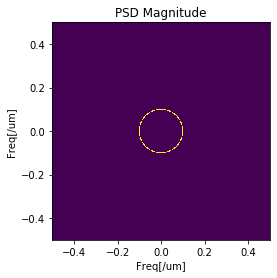

(1001,)

In [8]:
(Fx, Fy) = np.meshgrid(f_cpm, f_cpm)
Z = Fx**2 + Fy**2    # Equation of a circule
r = df_cpm * 100      # Radious of the ring
dr = df_cpm * 20     # Thikness of the ring
#a = np.where(Z >= 10)
#a = np.where(np.abs(Z - 10) < 1) 
a = np.where(np.abs(Z - r**2) < dr**2)   # Creates an array that contained zeros everywhere exept for the radii
A = Z * 0
A[a] = 1


plt.imshow(A, extent = extent)
plt.xlabel('Freq[/um]')
plt.ylabel('Freq[/um]')
plt.title('PSD Magnitude')
plt.show()
np.shape(Y1)
np.shape(A)
np.shape(f_cpm)

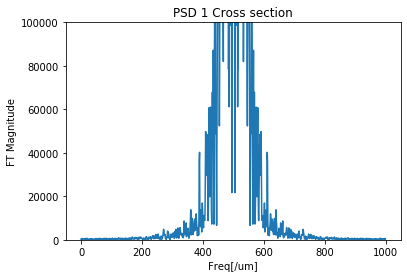

In [4]:
%matplotlib inline
(width, height) = data_1.shape
data_cross_x1 = np.abs(Y1[:, int(np.floor(height/2))])
plt.plot(data_cross_x1)
plt.title('PSD 1 Cross section')
plt.xlabel('Freq[/um]')
plt.ylabel('FT Magnitude')
plt.ylim((0, .1e6))
plt.show()

In [5]:
N = 500
circ_sum_1 = np.zeros(N)
for i in np.arange(N):
    r = df_cpm * i      # Radious of the ring
    dr = df_cpm     # Thikness of the ring
    #a = np.where(np.abs(Z - r**2) <= dr**2)   # Creates an array that contained zeros everywhere exept for the radii
    a = np.where((Z >= r**2) & (Z < (r + dr)**2))
    A = Z * 0
    A[a] = 1
    
    data_1 = np.asarray(spk_1) # Converts the image into a numpy array
    Y1 = np.fft.fftshift(np.fft.fft2(data_1))
    
    circ_sum_1[i] = np.sum(np.abs(Y1) * A) / np.sum(A)
    temp_1 = np.sum(np.abs(Y1) *A)
    plt.plot(f_cpm[500:] * 1e-6, circ_sum_1)
    plt.ylim((0, 10000))
    plt.title(list(im_dic.keys())[list(im_dic.values()).index(spk_num)])
    plt.xlabel('Freq[/um]')
    plt.ylabel('Circular Sum of PSD')
    plt.show()

ValueError: operands could not be broadcast together with shapes (1000,1000) (1001,1001) 

In [ ]:
import numpy as np
import supreme as sp
(dx_m, Dx_m, f_cpm, px_size_m, x_m, Nfft, df_cpm, Df_cpm) = sp.setfreq(1*10**-6, 1e-3)
im_dic = {}

In [ ]:
sp.spkim('C:\\Users\\User\\Downloads\\speckle_one.png', 1)

In [ ]:
sp.ftim(im_dic['spk_1'])